In [3]:
import numpy as np
import matplotlib.pyplot as plt

def calculomodos (Nx,Ny,Nz,lx,ly,lz,c0): 
 
    f=[]
    d=[]

    for nx in range(Nx):
        for ny in range(Ny):
            for nz in range(Nz):
                frec=(c0/2)*np.sqrt((nx/lx)**2+(ny/ly)**2+(nz/lz)**2)
                if nx!=0 and ny!=0 and nz!=0:
                    A="Modo oblicuo"
                if (nx==0) and ((ny!=0 and nz!=0)):
                    A="Modo tangencial"
                if (ny==0) and ((nx!=0 and nz!=0)):
                    A="Modo tangencial"
                if (nz==0) and ((ny!=0 and nx!=0)):
                    A="Modo tangencial"
                if nx==0 and (ny==0 or nz==0):
                    A="Modo axial"
                if ny==0 and (nx==0 or nz==0):
                    A="Modo axial"
                if nz==0 and (ny==0 or nx==0):
                    A="Modo axial"            
                f.append((frec,A))
    listaordenada=sorted(f)
    listatrunca=listaordenada[1:21]    
    print("Lista de los primeros 20 modos, sus frecuencias y numeros cuanticos",listatrunca)      
 
    for i in range(len(listatrunca)):     
        for j in range(i+1, len(listatrunca)):
            if listatrunca[i][0] == listatrunca[j][0]:         
                d.append(listatrunca[i])
                d.append(listatrunca[j])
    d = list(set(d))                        
    listaordenada2=sorted(d)                
    print()
    print("Lista de los modos degenerados de la lista anterior",listaordenada2)

SE PROVARÁ CON UN RECINTO DE DIMENSIONES (4,12,3)

In [4]:
calculomodos(15,15,15,4,12,3,344)

Lista de los primeros 20 modos, sus frecuencias y numeros cuanticos [(14.333333333333332, 'Modo axial'), (28.666666666666664, 'Modo axial'), (43.0, 'Modo axial'), (43.0, 'Modo axial'), (45.325979795746775, 'Modo tangencial'), (51.67956828165051, 'Modo tangencial'), (57.33333333333333, 'Modo axial'), (57.33333333333333, 'Modo axial'), (59.0978473005198, 'Modo tangencial'), (60.81118318204309, 'Modo tangencial'), (64.10061535499398, 'Modo tangencial'), (71.66666666666667, 'Modo axial'), (71.66666666666667, 'Modo tangencial'), (71.66666666666667, 'Modo tangencial'), (71.66666666666667, 'Modo tangencial'), (73.08594636149658, 'Modo oblicuo'), (77.18736223559456, 'Modo oblicuo'), (81.08157757605746, 'Modo tangencial'), (83.5769771594493, 'Modo oblicuo'), (83.57697715944931, 'Modo tangencial')]

Lista de los modos degenerados de la lista anterior [(43.0, 'Modo axial'), (57.33333333333333, 'Modo axial'), (71.66666666666667, 'Modo axial'), (71.66666666666667, 'Modo tangencial')]


CAMPO SONORO
        

In [5]:
Aob=1/2
Atan=1/4
Aax=1/8
q0 = 10**-5

In [6]:
def presionbandaancha (Nx,Ny,Nz,lx,ly,lz,xf,yf,zf,xr,yr,zr,c0,f1,f2):
    F=[]
    for f in range (f1,f2):
        suma = 0 
        for nx in range(Nx):
            for ny in range(Ny):
                for nz in range(Nz):
                    Psi0=np.cos((nx*np.pi*xf)/lx)*np.cos((ny*np.pi*yf)/ly)*np.cos((nz*np.pi*zf)/lz)
                    Psir=np.cos((nx*np.pi*xr)/lx)*np.cos((ny*np.pi*yr)/ly)*np.cos((nz*np.pi*zr)/lz)
                    numerador = Psi0*Psir
                    km=np.sqrt((nx*np.pi/lx)**2+(ny*np.pi/ly)**2+(nz*np.pi/lz)**2)
                    k0= (2*np.pi*f)/c0
                    if nx!=0 and ny!=0 and nz!=0:
                        A=Aob
                    if (nx==0) and ((ny!=0 and nz!=0)):
                        A=Atan
                    if (ny==0) and ((nx!=0 and nz!=0)):
                        A=Atan
                    if (nz==0) and ((ny!=0 and nx!=0)):
                        A=Atan
                    if nx==0 and (ny==0 or nz==0):
                        A=Aax
                    if ny==0 and (nx==0 or nz==0):
                        A=Aax
                    if nz==0 and (ny==0 or nx==0):
                        A=Aax            
                    denominador = (k0**2 - km**2)*A                    
                    fraccion = numerador/denominador                     
                    suma += fraccion
        PresionSonora=(-1j*(2*np.pi*f)*q0*suma)/(lx*ly*lz) 
        Modulo=np.abs(PresionSonora)
        prms=(Modulo/np.sqrt(2))
        Decibel=10*np.log((prms**2)/((2*10**(-5))**2))
        F.append(Decibel)
    return F

Medidas 9202:

Largo: 9.47 [m]
Ancho: 8.33 [m]
Alto: 2.95 [m]

In [7]:
ejefrec200 = list(range(15,200))

CALCULO DE LA SALA 9202 EN TRES PUNTOS DISTINTOS CON FUENTE EN ESQUINA A=(0,0,0)

In [8]:
PresionPunto1A= presionbandaancha(15,15,15,9.47,8.33,2.95,0,0,0,1,1,1,344,15,200) #(1,1,1)A
PresionPunto2A= presionbandaancha(15,15,15,9.47,8.33,2.95,0,0,0,4.5,4.5,1.5,344,15,200) #(4.5,4.5,1.5)A
PresionPunto3A= presionbandaancha(15,15,15,9.47,8.33,2.95,0,0,0,8,3,2,344,15,200) #(8,3,2)A

AHORA CON FUENTE EN POSICION INTERIOR B=(2,2,2)

In [9]:
PresionPunto1B= presionbandaancha(15,15,15,9.47,8.33,2.95,2,2,2,1,1,1,344,15,200) #(1,1,1)B
PresionPunto2B= presionbandaancha(15,15,15,9.47,8.33,2.95,2,2,2,4.5,4.5,1.5,344,15,200) #(4.5,4.5,1.5)B
PresionPunto3B= presionbandaancha(15,15,15,9.47,8.33,2.95,2,2,2,8,3,2,344,15,200) #(8,3,2)B

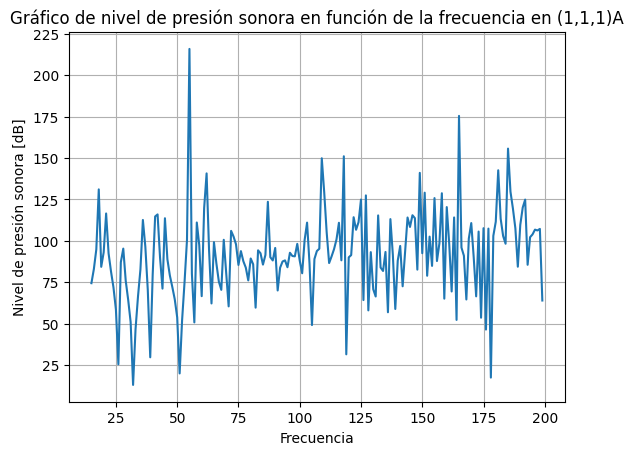

In [10]:
plt.plot(ejefrec200,PresionPunto1A) 
plt.xlabel('Frecuencia')  
plt.ylabel('Nivel de presión sonora [dB]')  
plt.title('Gráfico de nivel de presión sonora en función de la frecuencia en (1,1,1)A') 
plt.grid(True)  
plt.show()  


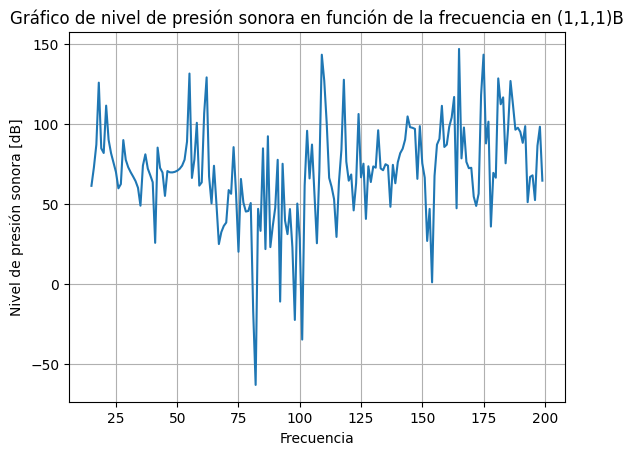

In [11]:
plt.plot(ejefrec200,PresionPunto1B) 
plt.xlabel('Frecuencia')  
plt.ylabel('Nivel de presión sonora [dB]')  
plt.title('Gráfico de nivel de presión sonora en función de la frecuencia en (1,1,1)B') 
plt.grid(True)  
plt.show()  


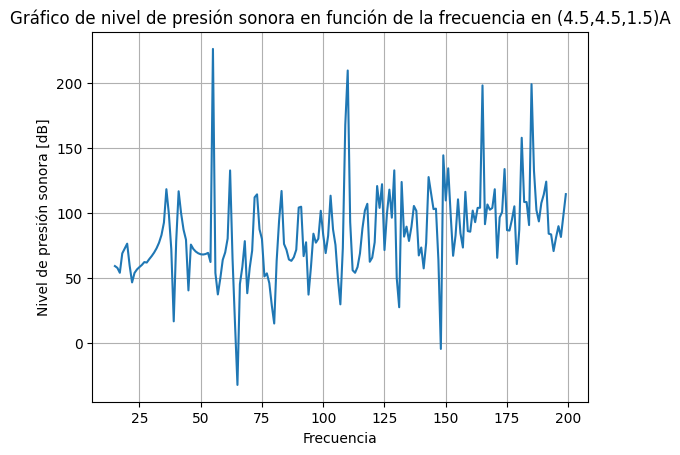

In [12]:
plt.plot(ejefrec200,PresionPunto2A) 
plt.xlabel('Frecuencia')  
plt.ylabel('Nivel de presión sonora [dB]')  
plt.title('Gráfico de nivel de presión sonora en función de la frecuencia en (4.5,4.5,1.5)A') 
plt.grid(True)  
plt.show()  


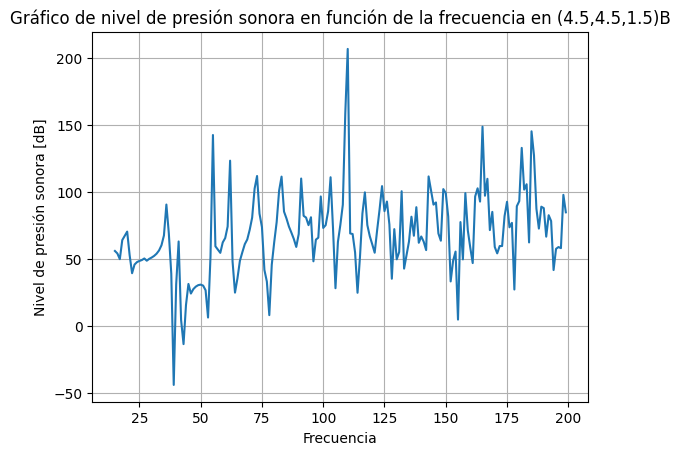

In [13]:
plt.plot(ejefrec200,PresionPunto2B) 
plt.xlabel('Frecuencia')  
plt.ylabel('Nivel de presión sonora [dB]')  
plt.title('Gráfico de nivel de presión sonora en función de la frecuencia en (4.5,4.5,1.5)B') 
plt.grid(True)  
plt.show()  


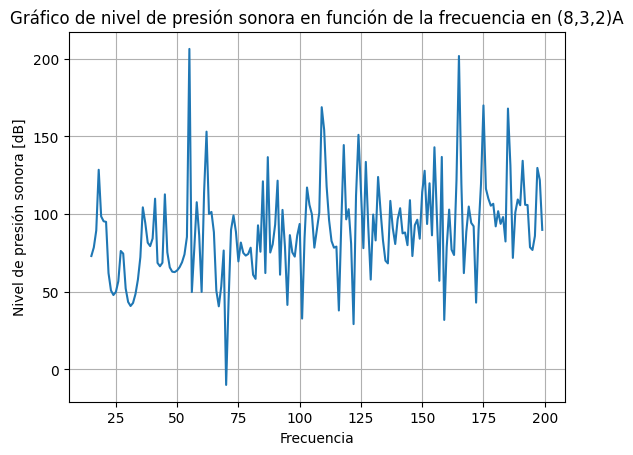

In [14]:
plt.plot(ejefrec200,PresionPunto3A) 
plt.xlabel('Frecuencia')  
plt.ylabel('Nivel de presión sonora [dB]')  
plt.title('Gráfico de nivel de presión sonora en función de la frecuencia en (8,3,2)A') 
plt.grid(True)  
plt.show()  


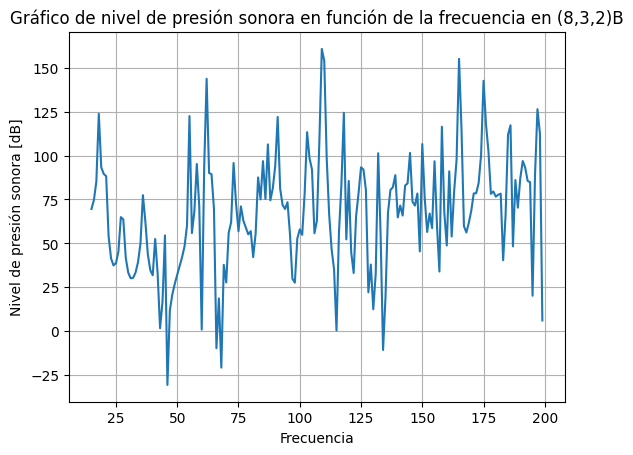

In [15]:
plt.plot(ejefrec200,PresionPunto3B) 
plt.xlabel('Frecuencia')  
plt.ylabel('Nivel de presión sonora [dB]')  
plt.title('Gráfico de nivel de presión sonora en función de la frecuencia en (8,3,2)B') 
plt.grid(True)  
plt.show()  


In [16]:
A1=np.mean(PresionPunto1A)
A2=np.mean(PresionPunto2A)
A3=np.mean(PresionPunto3A)
B1=np.mean(PresionPunto1B)
B2=np.mean(PresionPunto2B)
B3=np.mean(PresionPunto3B)


In [17]:
print(A1,A2,A3,B1,B2,B3) 

91.71185148603992 83.78777258082614 89.31255032454284 70.54445925469565 68.39356502573108 67.14802082408848
